In [8]:
#Bikash Giri (101575097) 
#Chia-Wei Chang (101570243) 
#Diparshan Bhattarai (101494737) 
#Hsi-Teng Liu (101576074) 
#Gavriel Kirichenko (101119609) 
#Abdul-Rasaq Omisesan (101571156) 
#Callum Arul (101585383) 
#Friba Hussainyar (101591222) 
#Vivek Panchal (101484976) 

###  2D Discrete Fourier Transform  of an image function and its inverse 

In [10]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2
import cv2 # if you do not have cv2 installed, run from the command line "pip install opencv-python" 
%matplotlib inline 
#show plots in the notebook

In [11]:
im = Image.open("fantasy.jpg")
np.shape(im) # -- We can see that this is RGB image

(3032, 3032, 3)

In [12]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

# alternative solution using PIL library
#new_img=im.resize((512,512))
#x=new_img.convert("L") # greyscale image
#y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0])) # convert to an array
#x.show()

In [13]:
#imshow(new_im, cmap='Greys')

In [14]:
# apply fft2 that refers to 2D fft. fft2() provides us the frequency transform which will be a complex array. It first argument is a greyscale image.
f=np.fft.fft2(new_im)
# next, we apply ffshift() that essentially performs multiplication operation f(x,y)(-1)^(x+y) and then takes the FT of this product.
# we want to place the zero frequency component in the center. Otherwise, it will be at the top left corner. We shift the result in both directions.
fshift=np.fft.fftshift(f)

In [15]:
# we have found DFT
fshift

array([[-18742.            +0.j        ,   1485.69882059 +5247.08524598j,
         -1848.44429436 -8129.74751493j, ...,
         22820.37195672 +5999.0862469j ,  -1848.44429436 +8129.74751493j,
          1485.69882059 -5247.08524598j],
       [ -1434.54267677  +903.58136969j,  14181.94711152 -5460.4533956j ,
         17936.86884832 -1712.27818336j, ...,
        -14318.75274821-11106.93076136j, -22846.19747492 -7102.24001691j,
          -674.36638017-11116.67630387j],
       [  7504.83927725+24279.51697279j, -31323.31323489 +8555.53731357j,
          3373.29412156-13546.95795072j, ...,
         15685.67103862+13515.59640525j, -12165.8611193 +23681.71495002j,
         -3131.40999296 +6064.53936187j],
       ...,
       [ 22380.74496122 +2321.29468753j,  21230.42868481 -8519.57559377j,
         22197.07528475 +1545.66846336j, ...,
        -10797.73475038-18053.71137548j,   4256.97609787 +1357.97843127j,
         -9393.64331882 -6686.66668427j],
       [  7504.83927725-24279.51697279j,  -3

In [16]:
# calculate the magnitude of DFT and log scale for the purpose of visualization
magnitude_spectrum=20*np.log(np.abs(fshift))

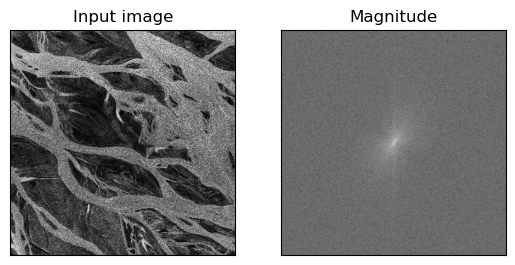

In [17]:
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

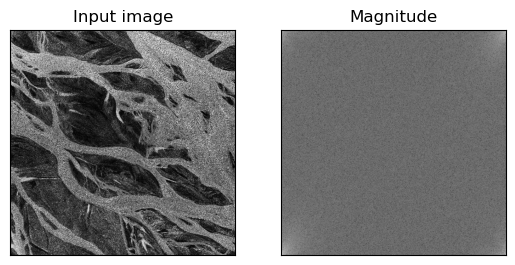

In [18]:
# We do not have a lot of low frequency content in this image.
# What happens if we undo shift operation?
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)
fshift=np.fft.ifftshift(fshift)
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

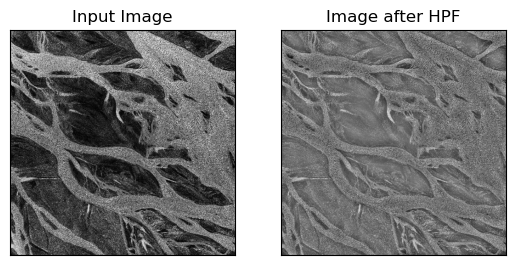

In [19]:
# We can hardly see the DC component.
# Having found the FT of an image, we can do some operations in frequency domain, 
# like highpass filtering or low pass filtering. WE can then reconstruct the image using inverse FFT.
f = np.fft.fft2(new_im)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = new_im.shape
row_c,col_c = int(rows/2) , int(cols/2)

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)

fshift[row_c-10:row_c+10, col_c-10:col_c+10] = 0

# We want to remove the low frequencies by masking with a rectangular window of size 20x20. Below is our solution: 
# 1. Apply the inverse shift using ifftshift() so that DC component again come at the top-left corner.
# 2. Find inverse FFT using ifft2() function. What would be the result of iFFT? 
# 3. Take its absolute value.

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
# We can see how High Pass filter can detect edges. However, we do lose information over the entire image. 
# And for this example we would rather not apply a High Pass filter. 

### Question 1: Rerun the above procedure without the application of the High Pass filter. Does the inverse FT reconstruct the image close to the original?

In [22]:
# paste the above cell here and make modifications to your code. 

#Yes, if you skip the high-pass filtering operation and only apply the inverse Fourier Transform (iFFT) on the unaltered frequency components, 
#the reconstructed image will be nearly identical to the original. This is because the Fourier Transform is a reversible operation, 
#and as long as no changes are made to the frequency domain representation, the inverse FT will fully restore the original image.

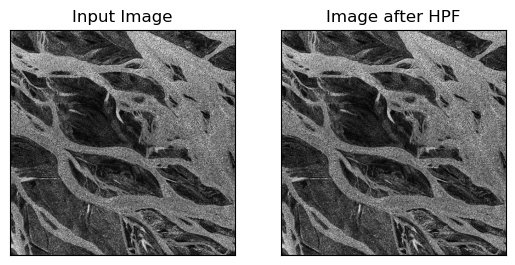

In [23]:
# We can hardly see the DC component.
# Having found the FT of an image, we can do some operations in frequency domain, 
# like highpass filtering or low pass filtering. WE can then reconstruct the image using inverse FFT.
f = np.fft.fft2(new_im)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = new_im.shape
row_c,col_c = int(rows/2) , int(cols/2)

# We want to remove the low frequencies by masking with a rectangular window of size 20x20. Below is our solution: 
# 1. Apply the inverse shift using ifftshift() so that DC component again come at the top-left corner.
# 2. Find inverse FFT using ifft2() function. What would be the result of iFFT? 
# 3. Take its absolute value.

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

### Question 2: Uncomment lines of code given below and continue to code in order to find the FT of "leaf.jpg" image and its Inverse.


In [25]:
im = Image.open("leaf.jpg")
np.shape(im) # -- We can see that this is RGB image
new_im=cv2.imread("leaf.jpg",0)
new_im=cv2.resize(new_im,(int(0.6*512),512)) # first is the width, second is height


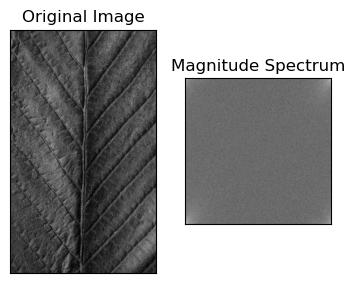

In [26]:
# Apply Fourier Transform
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)  # Center the zero-frequency component

# Apply inverse FT to reconstruct the image
f_ishift = np.fft.ifftshift(fshift)  # Undo the shift
img_back = np.fft.ifft2(f_ishift)  # Inverse FFT
img_back = np.abs(img_back)  # Take absolute value

# Display results
plt.subplot(131), plt.imshow(new_im, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

plt.show()


### Question 3: Display the magnitude of the FT of the leaf image. Does it show any prominent components along some directions? Do you think we can associate frequencies in the FT with patterns of intensity variation in an image? 

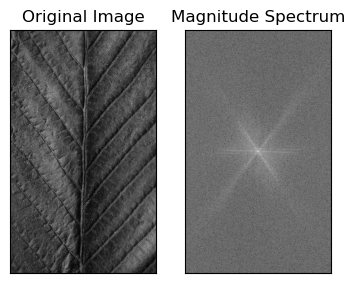

In [61]:
# copy and paste a piece of code for visualization and state your observations on the relationship between the frequency components
# of the Fourier transform and image spatial characteristics. 

# Apply Fourier Transform
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)  # Center the zero-frequency component

# Magnitude spectrum visualization
magnitude_spectrum = 1000 * np.log(np.abs(fshift))

# Display results
plt.subplot(131), plt.imshow(new_im, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])


plt.show()


Yes, the Original Image and the Magnitude Spectrum exhibit similar patterns corresponding to the leaf structure, which reflects how the Fourier Transform captures intensity variation patterns and their frequency compositions in an image.

The leaf structure in the original image (such as veins and textures) is represented in the spectrum as intensity components at specific frequencies and directions.